# Amazon Sales Report prepared by Prince Kumar

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\\princ\\Downloads\\Amazon Sale Report.csv',encoding= 'unicode_escape')

In [3]:
print(df.head())

   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...       IN

In [4]:
print(df.isnull().sum())

index                      0
Order ID                   0
Date                       0
Status                     0
Fulfilment                 0
Sales Channel              0
ship-service-level         0
Category                   0
Size                       0
Courier Status             0
Qty                        0
currency                7800
Amount                  7800
ship-city                 35
ship-state                35
ship-postal-code          35
ship-country              35
B2B                        0
fulfilled-by           89713
New                   128976
PendingS              128976
dtype: int64


In [5]:
df_cleaned = df.dropna()

In [6]:
df_cleaned = df_cleaned.drop_duplicates()

In [7]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned['Qty'] = df_cleaned['Qty'].astype(int)
df_cleaned['Amount'] = df_cleaned['Amount'].astype(float)


In [8]:
df_cleaned.to_csv('cleaned_amazon_sales_data.csv', index=False)

In [9]:
df_cleaned = pd.read_csv('cleaned_amazon_sales_data.csv')
print(df_cleaned.columns)

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by', 'New', 'PendingS'],
      dtype='object')


In [46]:
# Convert 'Amount' to numeric, coercing errors
df_cleaned['Amount'] = pd.to_numeric(df_cleaned['Amount'], errors='coerce')

# Drop rows where 'Amount' is NaN after conversion
df_cleaned = df_cleaned.dropna(subset=['Amount'])

In [47]:
# Ensure the 'Date' column is in datetime format
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], errors='coerce')

# Drop rows where 'Date' is missing after conversion
df_cleaned = df_cleaned.dropna(subset=['Date'])

# Extract 'year_month' from 'Date'
df_cleaned['year_month'] = df_cleaned['Date'].dt.to_period('M')

In [48]:
# Group by 'year_month' and sum the 'Amount'
sales_over_time = df_cleaned.groupby('year_month')['Amount'].sum().reset_index()

# Convert 'year_month' back to string for plotting
sales_over_time['year_month'] = sales_over_time['year_month'].astype(str)

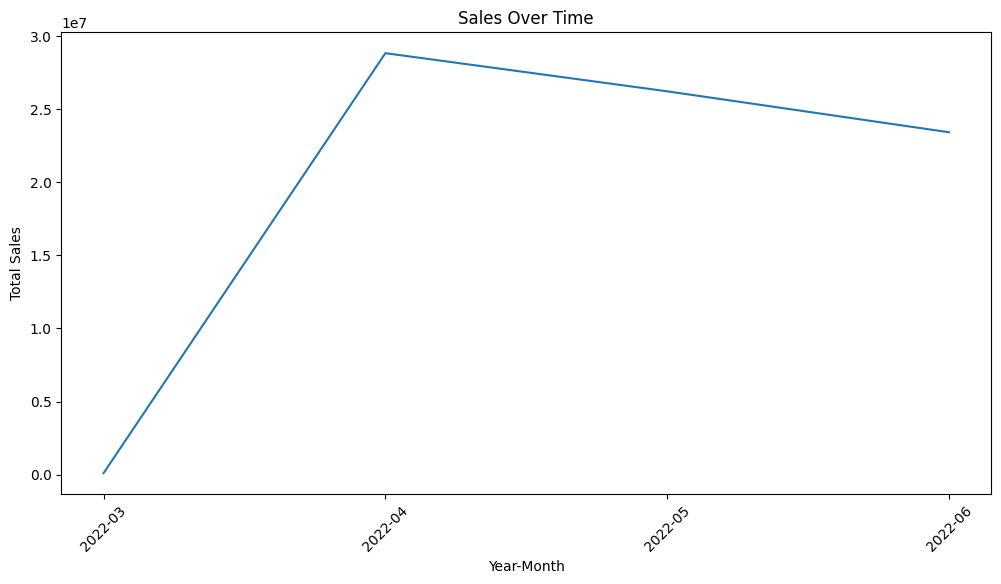

In [49]:
# Sales Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=sales_over_time, x='year_month', y='Amount')
plt.title('Sales Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [13]:
df['Date'] = pd.to_datetime(df['Date'])

In [14]:
print(df['Category'].isnull().sum())

0


In [15]:
df_cleaned = df.dropna(subset=['Category'])

In [16]:
print(df_cleaned.head())

   index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfilment Sales Channel ship-service-level  Category Size Courier Status  \
0   Merchant     Amazon.in           Standard   T-shirt    S     On the Way   
1   Merchant     Amazon.in           Standard     Shirt  3XL        Shipped   
2     Amazon     Amazon.in          Expedited     Shirt   XL        Shipped   
3   Merchant     Amazon.in           Standard   Blazzer    L     On the Way   
4     Amazon     Amazon.in          Expedited  Trousers  3XL        Shipped   

   ...  currency  Amount    ship-city   ship-state ship-postal-code  \
0  ...   

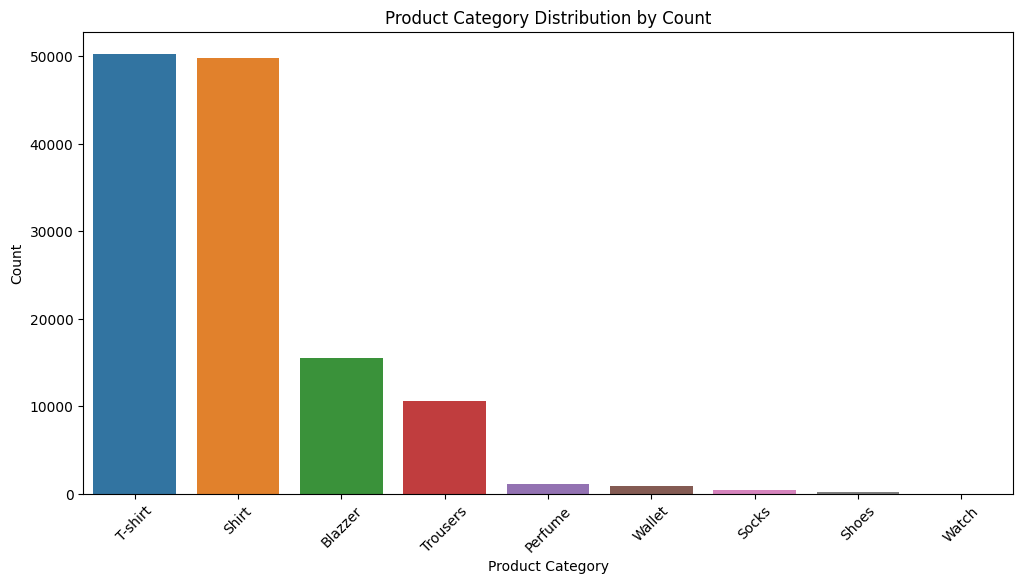

In [17]:
# Product Category Distribution by Count
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Category', order=df_cleaned['Category'].value_counts().index)
plt.title('Product Category Distribution by Count')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

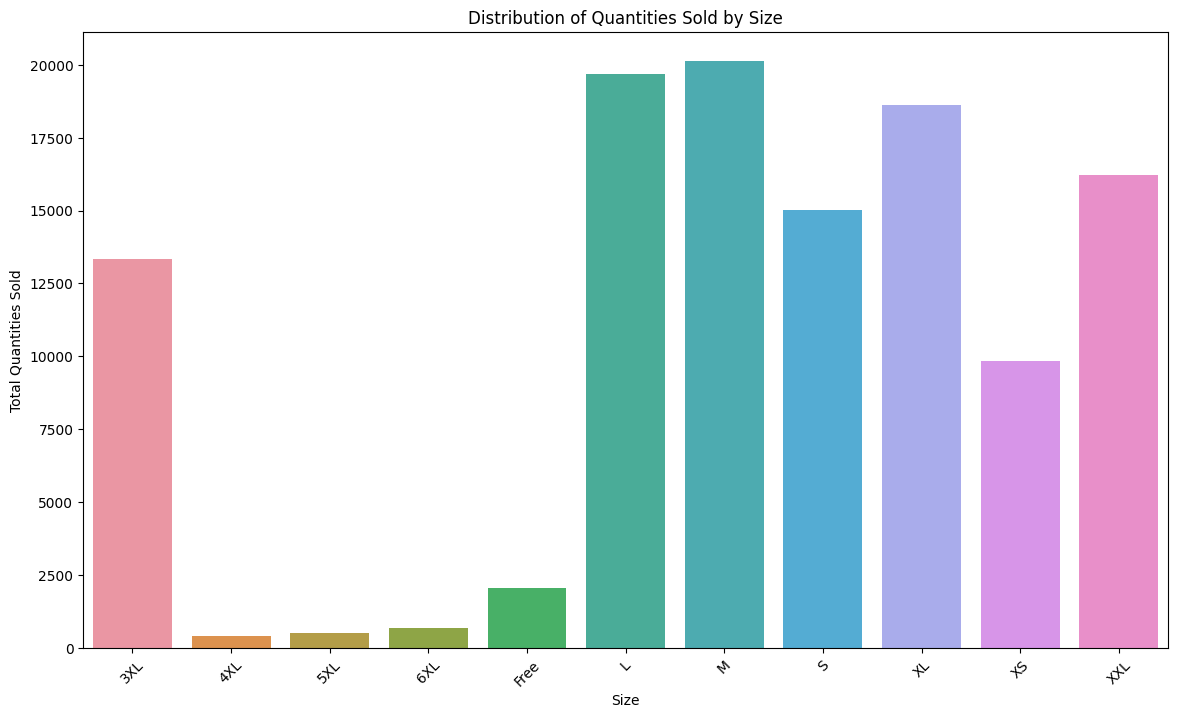

In [52]:
 #Clean 'Size' column
df_cleaned['Size'] = df_cleaned['Size'].astype(str).str.strip()

# Convert 'Qty' to numeric, handling non-numeric values
df_cleaned['Qty'] = pd.to_numeric(df_cleaned['Qty'], errors='coerce')

# Group by 'Size' and sum the 'Qty'
size_distribution = df_cleaned.groupby('Size')['Qty'].sum().reset_index()

# Plot the distribution of sizes
plt.figure(figsize=(14, 8))
sns.barplot(data=size_distribution, x='Size', y='Qty')
plt.title('Distribution of Quantities Sold by Size')
plt.xlabel('Size')
plt.ylabel('Total Quantities Sold')
plt.xticks(rotation=45)
plt.show()

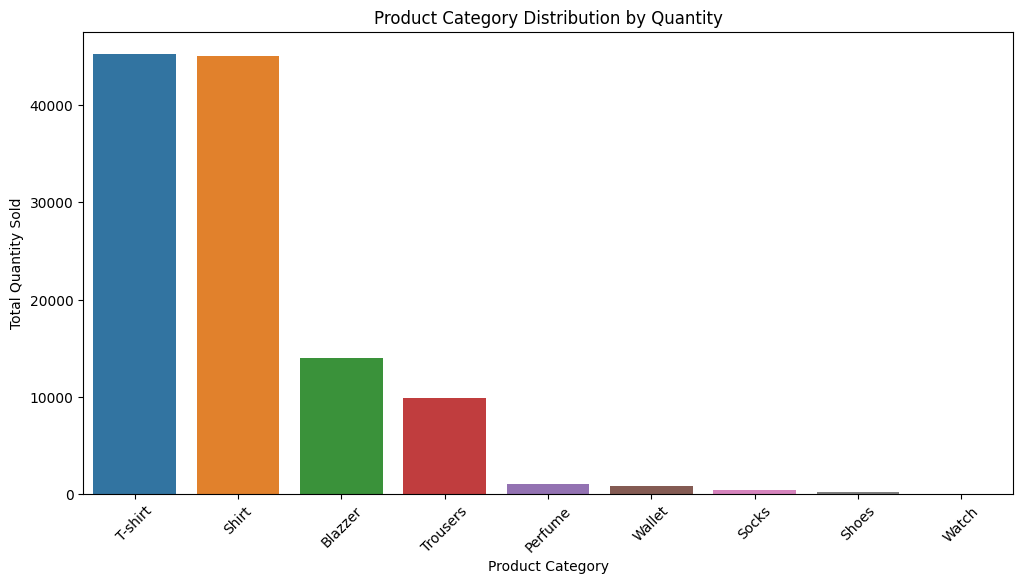

In [18]:
# Product Category Distribution by Quantity
category_quantity = df_cleaned.groupby('Category')['Qty'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=category_quantity, x='Category', y='Qty', order=category_quantity.sort_values('Qty', ascending=False)['Category'])
plt.title('Product Category Distribution by Quantity')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

According to this the most popular product is T-shirt followed by Shirt

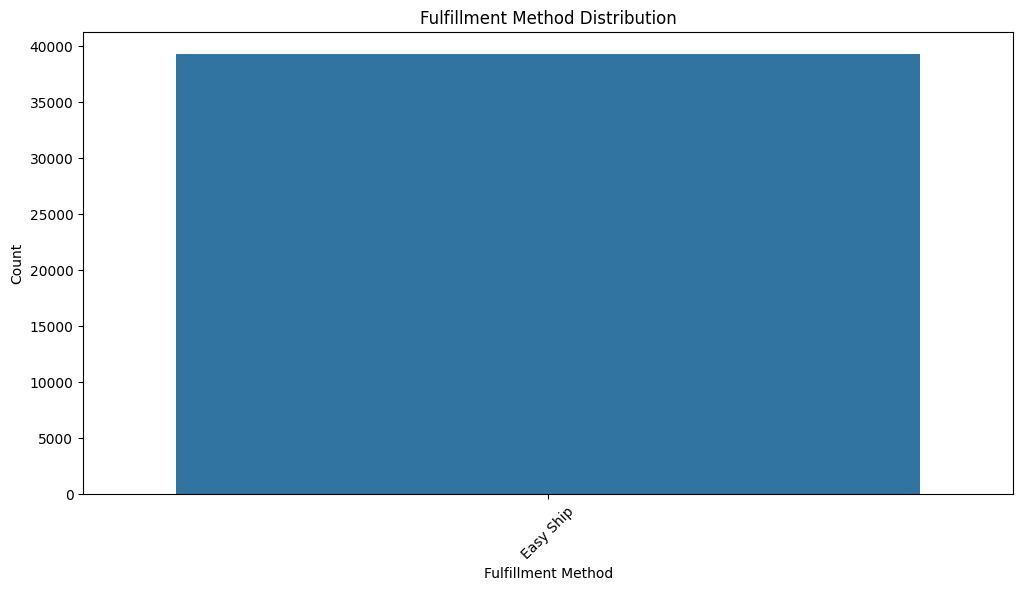

In [19]:
# Fulfillment Method Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='fulfilled-by', order=df_cleaned['fulfilled-by'].value_counts().index)
plt.title('Fulfillment Method Distribution')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Fulfillment method is easy ship and it is most effective in this case.


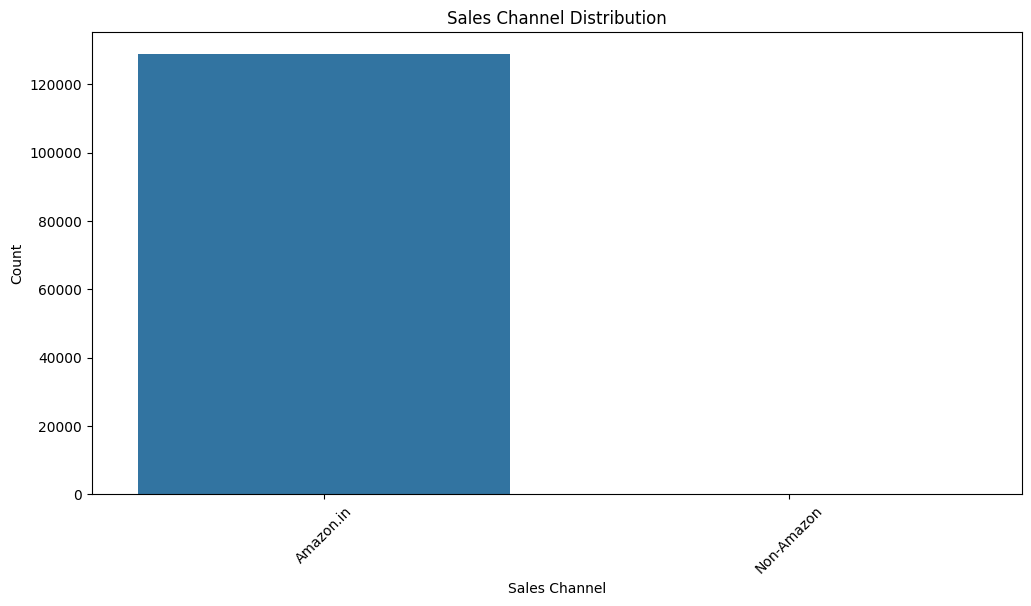

In [20]:
# Sales Channel Distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df_cleaned, x='Sales Channel', order=df_cleaned['Sales Channel'].value_counts().index)
plt.title('Sales Channel Distribution')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

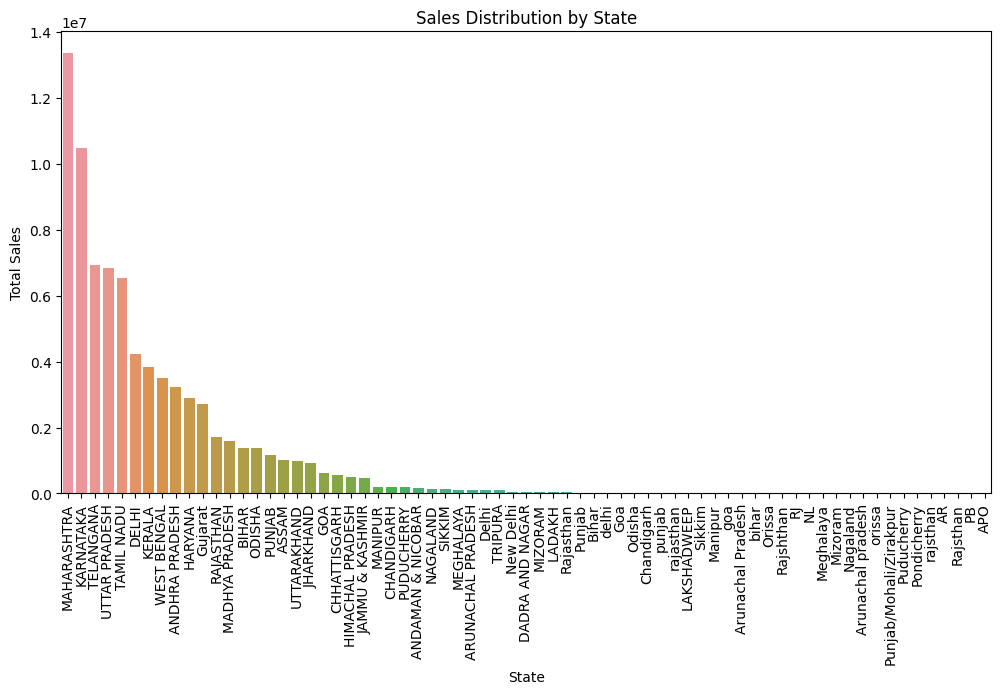

In [21]:
# Sales Distribution by State
sales_by_state = df_cleaned.groupby('ship-state')['Amount'].sum().reset_index().sort_values(by='Amount', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=sales_by_state, x='ship-state', y='Amount')
plt.title('Sales Distribution by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

In [22]:
# Calculate total sales
total_sales = df_cleaned['Amount'].sum()

# Calculate total orders
total_orders = df_cleaned['Order ID'].nunique()

# Calculate average order value
average_order_value = total_sales / total_orders

# Calculate total quantity sold
total_quantity_sold = df_cleaned['Qty'].sum()

# Display the metrics
print(f"Total Sales: {total_sales}")
print(f"Total Orders: {total_orders}")
print(f"Average Order Value: {average_order_value}")
print(f"Total Quantity Sold: {total_quantity_sold}")

Total Sales: 78590170.24999997
Total Orders: 120229
Average Order Value: 653.6706638997244
Total Quantity Sold: 116646


In [50]:
# Calculate monthly sales growth rate
sales_over_time['Sales Growth Rate'] = sales_over_time['Amount'].pct_change() * 100

# Display the growth rate
print(sales_over_time[['year_month', 'Sales Growth Rate']])

  year_month  Sales Growth Rate
0    2022-03                NaN
1    2022-04       28258.682593
2    2022-05          -9.050164
3    2022-06         -10.678779


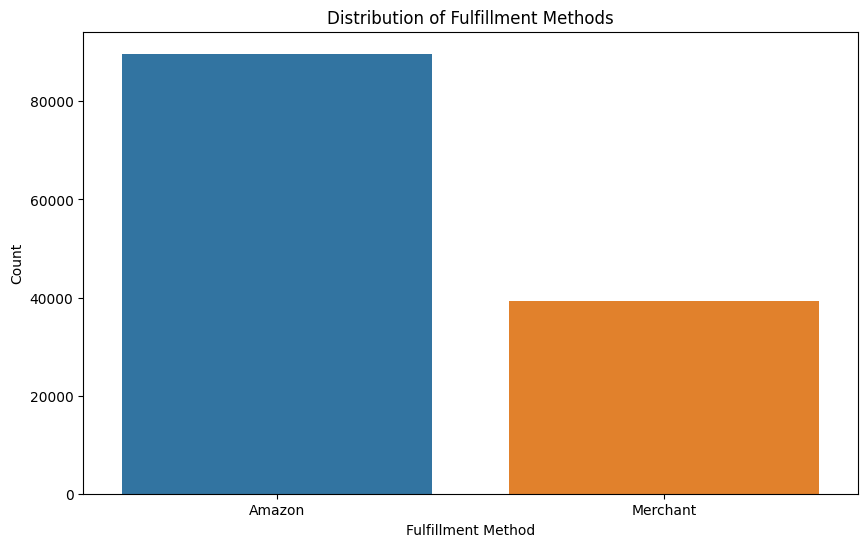

In [24]:
# Data cleaning
df_cleaned['Fulfilment'] = df_cleaned['Fulfilment'].str.strip()
df_cleaned['Courier Status'] = df_cleaned['Courier Status'].str.strip()
df_cleaned['Status'] = df_cleaned['Status'].str.strip()

# Analysis: Distribution of fulfillment methods
fulfillment_distribution = df_cleaned['Fulfilment'].value_counts()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=fulfillment_distribution.index, y=fulfillment_distribution.values)
plt.title('Distribution of Fulfillment Methods')
plt.xlabel('Fulfillment Method')
plt.ylabel('Count')
plt.show()

In [25]:
# Ensure 'Fulfilment' and 'Status' columns are clean
df_cleaned['Fulfilment'] = df_cleaned['Fulfilment'].astype(str).str.strip()
df_cleaned['Status'] = df_cleaned['Status'].astype(str).str.strip()

# Display first few rows to check the data
df_cleaned[['Fulfilment', 'Status']].head()

,Fulfilment,Status
0,Merchant,Cancelled
1,Merchant,Shipped - Delivered to Buyer
2,Amazon,Shipped
3,Merchant,Cancelled
4,Amazon,Shipped


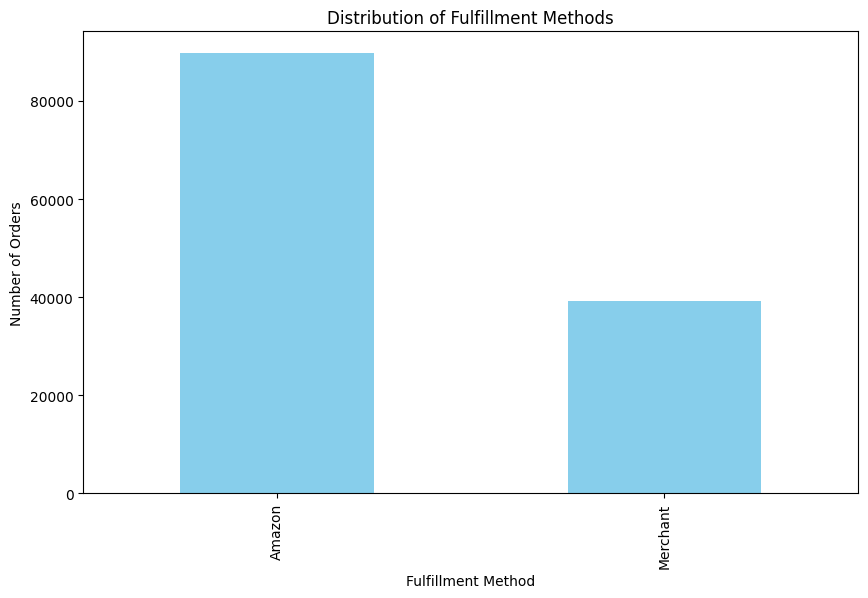

In [26]:
# Distribution of fulfillment methods
fulfillment_distribution = df_cleaned['Fulfilment'].value_counts()

# Plotting the distribution
plt.figure(figsize=(10, 6))
fulfillment_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Fulfillment Methods')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.show()


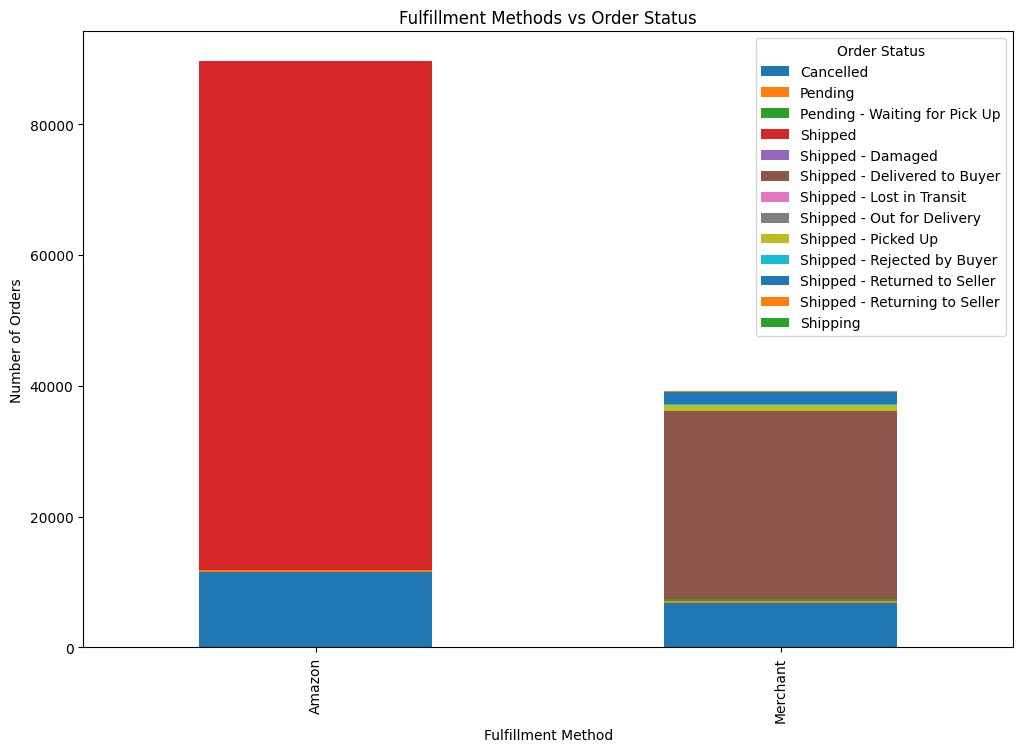

In [27]:
# Crosstab between Fulfillment Method and Order Status
fulfillment_status_crosstab = pd.crosstab(df_cleaned['Fulfilment'], df_cleaned['Status'])

# Plotting the crosstab
fulfillment_status_crosstab.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Fulfillment Methods vs Order Status')
plt.xlabel('Fulfillment Method')
plt.ylabel('Number of Orders')
plt.legend(title='Order Status')
plt.show()

In [36]:
customer_spending = df.groupby('Order ID')['Amount'].sum().reset_index()

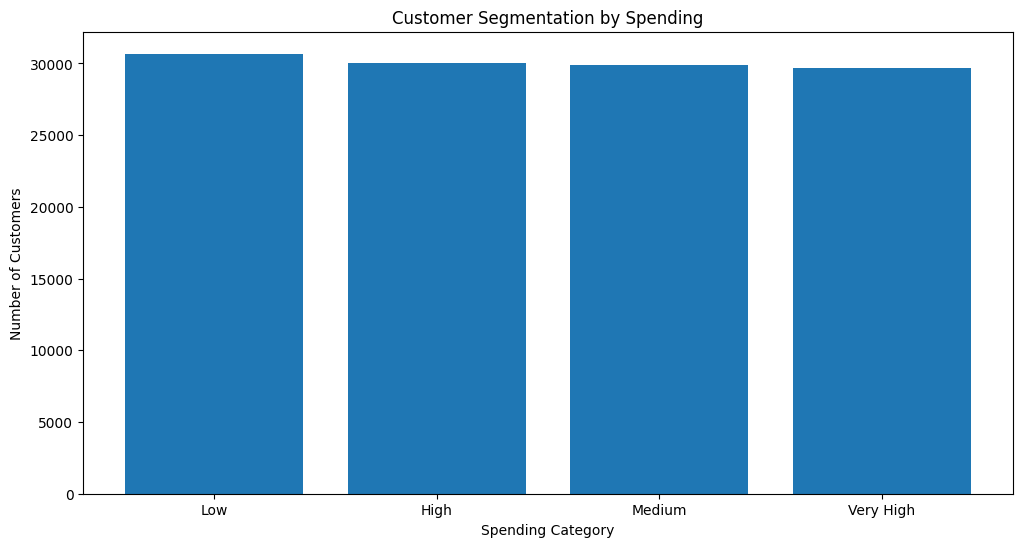

In [37]:
customer_spending['Spending'] = pd.qcut(customer_spending['Amount'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
spending_counts = customer_spending['Spending'].value_counts()

plt.figure(figsize=(12, 6))
plt.bar(spending_counts.index, spending_counts.values)
plt.title('Customer Segmentation by Spending')
plt.xlabel('Spending Category')
plt.ylabel('Number of Customers')
plt.show()

In [32]:
category_sales = df.groupby('Category')['Amount'].sum().reset_index()
category_sales = category_sales.sort_values(by='Amount', ascending=False)

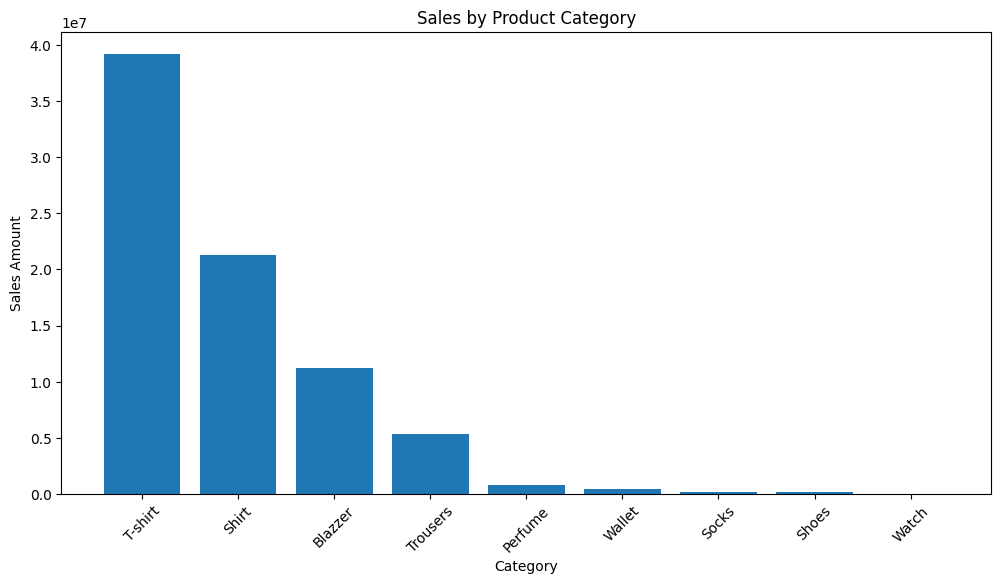

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(category_sales['Category'], category_sales['Amount'])
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [42]:
# Ensure the geographical columns are clean
df_cleaned['ship-state'] = df_cleaned['ship-state'].astype(str).str.strip()
df_cleaned['ship-country'] = df_cleaned['ship-country'].astype(str).str.strip()

In [43]:
# Count the number of orders per state
geographical_distribution = df_cleaned['ship-state'].value_counts().reset_index()
geographical_distribution.columns = ['ship-state', 'counts']

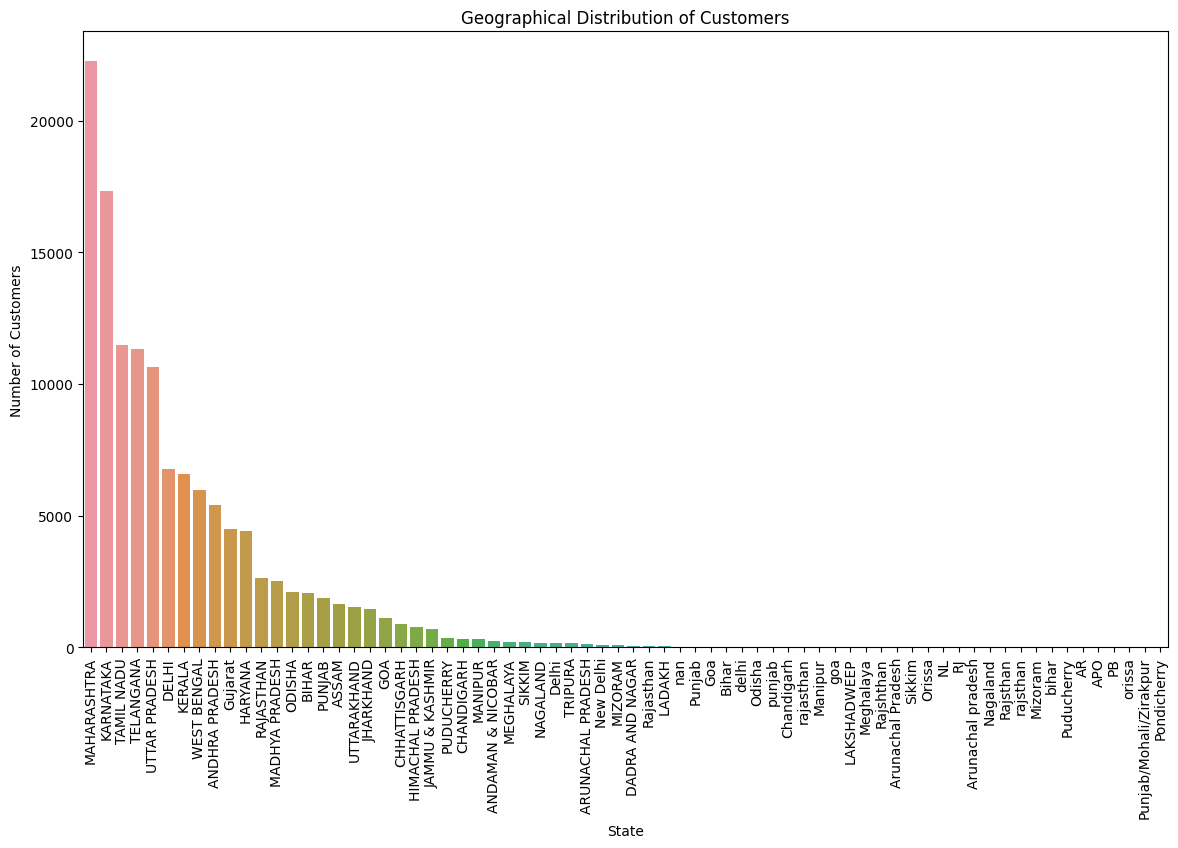

In [44]:
# Check if the geographical distribution DataFrame is empty
if not geographical_distribution.empty:
    # Plot the geographical distribution
    plt.figure(figsize=(14, 8))
    sns.barplot(data=geographical_distribution, x='ship-state', y='counts')
    plt.title('Geographical Distribution of Customers')
    plt.xlabel('State')
    plt.ylabel('Number of Customers')
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    plt.show()
else:
    print("No data available for geographical distribution.")

# Actionable Insights and Recommendations

1. Optimize Sales Strategies: 
   - Use sales trends to plan promotions and inventory for peak seasons.
   - Promote best-sellers and re-evaluate low-performing items.
   - Boost high-performing sales channels and improve weaker ones.
2. Improve Customer Satisfaction:
   - Tailor campaigns to regions with high customer concentrations and address barriers in low-performing areas.
   - Enhance processing and delivery speed to reduce pending orders.
   - Regularly gather and act on customer feedback to improve products and services.
3. Enhance Overall Business Performance:
   - Use data analytics for informed decision-making and regular performance monitoring.
   - Develop personalized marketing strategies for different customer groups.
   - Adjust stock levels based on sales data to prevent stockouts and overstocking.
   
Apart from all these insights there are certain recommendations that include:
1. Targeted Promotions: Leverage peak sales periods identified in the data to run targeted promotions and also Bundle high-performing products with lower-performing ones to boost overall sales.
2. Data-Driven Marketing and Dynamic Pricing: nvest more in top-performing sales channels and explore new potential channels, Implement time-sensitive discounts and loyalty programs to encourage repeat purchases and egment customers based on purchase behavior and demographics for personalized marketing.

- For effective inventory management, leverage historical sales data to forecast demand and maintain safety stock for high-demand products to avoid stockouts. Build strong relationships with reliable suppliers and negotiate flexible contracts that can adapt to demand fluctuations. Integrate advanced inventory management systems for real-time tracking and use automated reordering to ensure optimal stock levels.


# Implementation Roadmap
1. Short-Term: Implement targeted promotions and dynamic pricing strategies, Upgrade inventory management systems and establish safety stock levels, Enhance customer communication and gather feedback.

2. Medium-Term (3-6 months): Launch segmented marketing campaigns and optimize sales channel, Strengthen supplier relationships and negotiate flexible contracts and Expand customer support and introduce personalized experiences.

3. Long-Term (6-12 months): Continuously refine sales strategies based on data analytics, Implement automated reordering and improve demand forecasting and Develop comprehensive loyalty programs and personalized marketing initiatives.
